# Introduction to random generation of Latitude values.

In [1]:
# Import the dependencies
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library
import requests
# Import the API key.
from config import weather_api_key

# Create Latitude and Longitude Combinations

In [2]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# The zip() object packs each pair of lats and lngs having the same index in their
# respective arrays into a tuple.

# If there are 1500 lats and longs, there will be 1500 tuples of paired lats and lngs, where
# each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [3]:
# Let's practice zipping a small number of latitudes and longitudes and then unpacking the zipped tuple
# to see how the packing and unpacking work.


## See API_practice.ipynb

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)
coordinates

# NOTE: You can only UNZIP a tuple ONCE before it is removed from the computer's memory.
# That is the reason that I commented out the previous line of code.

[(-43.352512976812726, -79.30722447953318),
 (14.986818936270467, -42.6260222273074),
 (31.058323240863203, -18.44755330171907),
 (60.46769450392665, 149.93711458083862),
 (35.02032768015316, 177.25597790364935),
 (17.436370371642766, -128.48536597140503),
 (55.050906474723604, -40.71926760734897),
 (-31.400780394489885, -62.549388500472375),
 (-79.87562130931613, -144.0501625957092),
 (78.29418854684619, -29.53574254282043),
 (-55.26170795094886, 11.50727011286125),
 (61.68467192514228, 107.30376262849342),
 (-3.1317542376642393, 79.00927858167813),
 (-77.83210136202335, -36.935759270331744),
 (-19.50615462260879, -96.2701415017033),
 (-72.0953053718919, 26.69757025221972),
 (-16.113527874687364, -0.4601603286840543),
 (84.20306331809334, -142.77191139689566),
 (-11.117517251456334, -50.06681713818557),
 (81.72595528673261, -73.4042997397311),
 (0.1012448940482642, 58.57944872336466),
 (-19.08930627521083, 68.30235188081738),
 (-19.047263047770244, -114.38992466667162),
 (33.398317057

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

chonchi cl
remire-montjoly gf
ribeira brava pt
magadan ru
utrik mh
guerrero negro mx
qaqortoq gl
devoto ar
waitangi nz
isafjordur is
hermanus za
kirensk ru
fuvahmulah mv
grytviken gs
puerto ayora ec
kruisfontein za
jamestown sh
badger us
santa terezinha br
iqaluit ca
la passe sc
port mathurin mu
adamstown pn
muroto-misakicho jp
san agustin de valle fertil ar
kotido ug
jabor mh
aasiaat gl
port-aux-francais tf
port-aux-francais tf
eureka us
adamstown pn
daru pg
polyarnyy ru
grytviken gs
anadyr ru
college us
mirny ru
clisson fr
manggar id
hithadhoo mv
sitka us
puerto ayora ec
georgetown sh
tazacorte es
edinburgh of the seven seas sh
papatowai nz
blackmans bay au
mount gambier au
kanniyakumari in
mananjary mg
grytviken gs
waitangi nz
ilulissat gl
puerto colombia co
avarua ck
tsiombe mg
bethel us
amga ru
port alfred za
port-aux-francais tf
edinburgh of the seven seas sh
dickinson us
santa maria do para br
grytviken gs
bigastro es
edinburgh of the seven seas sh
griffith au
grytviken gs
ciuda

kavarna bg
atafu village tk
bredasdorp za
saalfelden am steinernen meer at
beyneu kz
port-aux-francais tf
obuase gh
kruisfontein za
port-aux-francais tf
waitangi nz
bahia de kino mx
shahdad kot pk
puerto natales cl
tshabong bw
puerto natales cl
lebu cl
chibougamau ca
longyearbyen sj
west island cc
port alfred za
shakhun'ya ru
udachny ru
avarua ck
utrik mh
penha br
okhotsk ru
wailua homesteads us
yangiyer uz
codrington ag
ushuaia ar
arkalyk kz
edinburgh of the seven seas sh
port-aux-francais tf
grytviken gs
tazovsky ru
edinburgh of the seven seas sh
punta arenas cl
pelabuhanratu id
hithadhoo mv
mato verde br
yellowknife ca
hithadhoo mv
invercargill nz
barbastro es
grytviken gs
port-aux-francais tf
port-aux-francais tf
burutu ng
port-aux-francais tf
leava wf
timimoun dz
badger us
mejit mh
port lincoln au
port-aux-francais tf
sebastopol us
holualoa us
vuktyl ru
west island cc
tolanaro mg
adamstown pn
dudinka ru
taiohae pf
isafjordur is
port-aux-francais tf
paso de los libres ar
talnakh ru

In [6]:
# In a new cell, display the coordinate pairs with the following code.
# NOTE: You can only UNZIP a tuple ONCE before it is removed from the computer's memory.
# Use the tuple() to display the latitude and longitude combination.
# Also show the nearest city name and country code that corresponds to the coordinate pair.
# The citipy modules finds the nearest city to the latitude and longitude pair with a
# population of 500 or more.

cities = list()

# Note that coordinates is defined on line [11] above where the lat_lngs ZIP file was unpacked.
for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count.
len(cities)

606

## Mod 6.2.6 Get the City Weather Data - retrieving the weather data for 500+ cities.

### Let's use pseudocode first:
#### 1. Import our dependencies and initialize counter and an empty list that will hold the weather data.
#### 2. Loop through the cities list.
#### 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
#####     Two counters will need to be here: one to log the city count from 1 to 50, and another for the sets.
#### 4. Build the city_url or endpoint for each city.
#### 5. Log the url and record and set numbers.
#### 6. Make an api request for each city.
#### 7. Parse the JSON weather data for the following
##### ---> city, country, and date
##### ---> latitude and longitude
##### ---> maximum temperature
##### ---> humidity
##### ---> cloudiness
##### ---> wind speed
#### 8. Add the data to a list in a dictionary format and then convert it to a DataFrame.

In [7]:
# Import dependencies and initialize an empty list and counters.

# Add a print statement that references the beginning of the logging; 
# create counters for the records 1-50 and the set counter.

# Import the requests library and the weather_api_key (see beginning of script - DONE)

# Import the time library and the datetime module for the datetime module.
import time
from datetime import datetime

In [8]:
# Build the basic url for the OpenWeatherMap with my weather_api_key added to the URL.
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=imperial&appid=302b37f99151e7a3392d87b0c9c3f40e&q=Boston


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the JSON text of the 'Get' request.
boston_data = city_weather.json()
boston_data


{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 74.12,
  'feels_like': 74.71,
  'temp_min': 69.75,
  'temp_max': 77.94,
  'pressure': 1018,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 100},
 'clouds': {'all': 100},
 'dt': 1693251606,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1693217105,
  'sunset': 1693265187},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
boston_data['weather'][0]['description']

'overcast clouds'

In [13]:
# Next, add the following code, but do NOT run the cell. Instead continue to add
# on to this code block.
 
# Create an empty list to hold the weather data.
city_data =[]

# Print the beginning of the logging.
print('Beginning Data Retrieval')
print('________________________')

# Create counters
record_count = 1
set_count = 1

# Loop through the Cities and build the URL
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url for each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, set number, and city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 for record count.
    record_count += 1

    # Next, we will retrieve the data from the JSON weather response for each city.
    # NOTE: When retrieving data from an API, or even when scraping a webpage,
    # make sure that there is data to parse. If not, the script might stop at that
    # moment and not finish getting all the data that we need.

    # How to handle errors while passing weather data from a JSON file.

    # We'll add try-except block to our code to prevent the API request 
    # from stopping prematurely fi the city_weather request isn't a valid response.

    # If the request isn't valid, the code will not find the first item requested,
    # which is the dictionary "coord" with the code: 
    # city_lat = city_weather['coord']['lat'], and skip the city and 
    # continue to run.

    # The try-except block has similar syntax and structure as 
    # the if-else statement.
    #   try:
    #      Do Something
    #   except:
    #      print("An exception occurred")

    # Add the following code after "record_count += 1"

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the data needed.
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_current = city_weather["weather"][0]["description"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%y-%m-%d %H:%M:%S')
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed':city_wind,
                          'Country': city_country,
                          'Date': city_date,
                          'Current Description': city_current})
# If an error is experienced, skip the city
    except:
        print('City not found. Skipping......')
        pass

# Indicate that Data Loading is complete.
print('-----------------------------------')
print('      Data Retrieval Complete      ')
print('-----------------------------------')






Beginning Data Retrieval
________________________
Processing Record 1 of Set 1 | chonchi
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | ribeira brava
Processing Record 4 of Set 1 | magadan
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | devoto
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | kirensk
Processing Record 13 of Set 1 | fuvahmulah
City not found. Skipping......
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | santa terezinha
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | port ma

Processing Record 40 of Set 4 | chinde
Processing Record 41 of Set 4 | saudarkrokur
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | igarka
Processing Record 44 of Set 4 | hailey
Processing Record 45 of Set 4 | magistral'nyy
Processing Record 46 of Set 4 | ust'-ordynskiy
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | vorkuta
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | yaren
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | invercargill
Processing Record 4 of Set 5 | aflou
Processing Record 5 of Set 5 | xilin hot
Processing Record 6 of Set 5 | vadso
Processing Record 7 of Set 5 | atafu village
Processing Record 8 of Set 5 | gisborne
Processing Record 9 of Set 5 | priozersk
Processing Record 10 of Set 5 | vila velha
Processing Record 11 of Set 5 | queenstown
Processing Record 12 of Set 5 | danville
Processing Record 13 of Set 5 | la cruz
Processi

Processing Record 31 of Set 8 | vuktyl
Processing Record 32 of Set 8 | paso de los libres
Processing Record 33 of Set 8 | port saint john's
Processing Record 34 of Set 8 | tsiolkovskiy
City not found. Skipping......
Processing Record 35 of Set 8 | qamdo
Processing Record 36 of Set 8 | champerico
Processing Record 37 of Set 8 | ta`u
Processing Record 38 of Set 8 | at taj
Processing Record 39 of Set 8 | ocean pointe
City not found. Skipping......
Processing Record 40 of Set 8 | malakwal city
Processing Record 41 of Set 8 | paracuru
Processing Record 42 of Set 8 | nampula
Processing Record 43 of Set 8 | yeniseysk
Processing Record 44 of Set 8 | puerto deseado
Processing Record 45 of Set 8 | gaalkacyo
Processing Record 46 of Set 8 | sangmelima
Processing Record 47 of Set 8 | progreso
Processing Record 48 of Set 8 | tutoia
Processing Record 49 of Set 8 | zarghun shahr
Processing Record 50 of Set 8 | korocha
Processing Record 1 of Set 9 | turpan
Processing Record 2 of Set 9 | sainte-anne-des

Processing Record 18 of Set 12 | sabinov
Processing Record 19 of Set 12 | cadale
Processing Record 20 of Set 12 | qujing
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | volnovakha
Processing Record 23 of Set 12 | sefwi wiawso
City not found. Skipping......
Processing Record 24 of Set 12 | zaozersk
Processing Record 25 of Set 12 | piton saint-leu
Processing Record 26 of Set 12 | fuerte olimpo
Processing Record 27 of Set 12 | vieux fort
Processing Record 28 of Set 12 | atar
Processing Record 29 of Set 12 | shixing
Processing Record 30 of Set 12 | itoman
Processing Record 31 of Set 12 | kudahuvadhoo
Processing Record 32 of Set 12 | aripuana
Processing Record 33 of Set 12 | anori
Processing Record 34 of Set 12 | jeddah
Processing Record 35 of Set 12 | margate
Processing Record 36 of Set 12 | thunder bay
Processing Record 37 of Set 12 | anatuya
Processing Record 38 of Set 12 | sungai penuh
Processing Record 39 of Set 12 | miyoshi
Processing Record 40 of Set 12 | per

In [14]:
# After collecting all of our data, we can tally the number of cities in the city_data array
# of dictionairies using the len() function.

len(city_data)

577

In [15]:
print(city_data)

[{'City': 'Chonchi', 'Lat': -42.6128, 'Lng': -73.8092, 'Max Temp': 51.01, 'Humidity': 67, 'Cloudiness': 68, 'Wind Speed': 4.72, 'Country': 'CL', 'Date': '23-08-28 19:46:42', 'Current Description': 'broken clouds'}, {'City': 'Remire-Montjoly', 'Lat': 4.9167, 'Lng': -52.2667, 'Max Temp': 89.64, 'Humidity': 66, 'Cloudiness': 0, 'Wind Speed': 12.66, 'Country': 'GF', 'Date': '23-08-28 19:46:42', 'Current Description': 'clear sky'}, {'City': 'Ribeira Brava', 'Lat': 32.65, 'Lng': -17.0667, 'Max Temp': 77, 'Humidity': 54, 'Cloudiness': 2, 'Wind Speed': 8.95, 'Country': 'PT', 'Date': '23-08-28 19:46:43', 'Current Description': 'clear sky'}, {'City': 'Magadan', 'Lat': 59.5667, 'Lng': 150.8, 'Max Temp': 51.67, 'Humidity': 73, 'Cloudiness': 12, 'Wind Speed': 8.55, 'Country': 'RU', 'Date': '23-08-28 19:46:43', 'Current Description': 'few clouds'}, {'City': 'Utrik', 'Lat': 11.2278, 'Lng': 169.8474, 'Max Temp': 82.85, 'Humidity': 79, 'Cloudiness': 94, 'Wind Speed': 14.25, 'Country': 'MH', 'Date': '23

In [16]:
# Mod 6.2.7 Create a DataFrame of the City Weather Data

# You have a list of dictionairies, which is a format that you can use to create a Pandas DataFrame.

# You will also need to export the DataFrame as a csv file.

# Our next step will entail converting the array of dictionairies to a DataFrame, ensuring the
# columns are in correct order, and exporting the DataFrame to a CSV file.

city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Current Description
0,Chonchi,-42.6128,-73.8092,51.01,67,68,4.72,CL,23-08-28 19:46:42,broken clouds
1,Remire-Montjoly,4.9167,-52.2667,89.64,66,0,12.66,GF,23-08-28 19:46:42,clear sky
2,Ribeira Brava,32.6500,-17.0667,77.00,54,2,8.95,PT,23-08-28 19:46:43,clear sky
3,Magadan,59.5667,150.8000,51.67,73,12,8.55,RU,23-08-28 19:46:43,few clouds
4,Utrik,11.2278,169.8474,82.85,79,94,14.25,MH,23-08-28 19:46:43,overcast clouds
...,...,...,...,...,...,...,...,...,...,...
572,Kili,5.6439,169.1211,82.89,70,85,1.61,MH,23-08-28 20:01:54,light rain
573,Acapulco De Juarez,16.8634,-99.8901,90.59,60,90,8.16,MX,23-08-28 20:00:25,light rain
574,Zeya,53.7500,127.2667,52.18,71,1,2.75,RU,23-08-28 20:01:54,clear sky
575,Fantino,19.1215,-70.2997,96.31,54,14,10.60,DO,23-08-28 20:01:55,few clouds


In [17]:
# Changing the column order.

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Current Description']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description
0,Chonchi,CL,23-08-28 19:46:42,-42.6128,-73.8092,51.01,67,68,4.72,broken clouds
1,Remire-Montjoly,GF,23-08-28 19:46:42,4.9167,-52.2667,89.64,66,0,12.66,clear sky
2,Ribeira Brava,PT,23-08-28 19:46:43,32.6500,-17.0667,77.00,54,2,8.95,clear sky
3,Magadan,RU,23-08-28 19:46:43,59.5667,150.8000,51.67,73,12,8.55,few clouds
4,Utrik,MH,23-08-28 19:46:43,11.2278,169.8474,82.85,79,94,14.25,overcast clouds
5,Guerrero Negro,MX,23-08-28 19:46:44,27.9769,-114.0611,80.83,56,12,10.94,few clouds
6,Qaqortoq,GL,23-08-28 19:46:44,60.7167,-46.0333,49.98,50,54,0.98,broken clouds
7,Devoto,AR,23-08-28 19:46:44,-31.4043,-62.3063,69.66,20,1,15.55,clear sky
8,Waitangi,NZ,23-08-28 19:46:44,-43.9535,-176.5597,48.81,91,100,11.99,light rain
9,Isafjordur,IS,23-08-28 19:46:45,66.0755,-23.1240,50.40,83,40,6.11,scattered clouds


In [19]:
# Now, we will create an output file to save the city_data_df DataFrame as a CSV file 
# in a new folder called weather_data.

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the city_data_df DataFrame into a CSV file.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the 
# index label (or column A) header as "City_ID"

# If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [24]:
# Mod 6.3.1 Plot latitude vs Temperature
# We are going to create scatter plots for latitude vs maximum temperature, humidity, cloudiness, and wind speed.

# REWIMD --> Recall that to create a scatter plot, we collect and then add x- and y-axis data to plt.scatter().



# Get dData for Plotting.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# To add the current date, we will need to import the 'time' module.

# Import time module
import time

In [26]:
# Get today's date in seconds
time.strftime("%x")

# For more information, we the documentation on the time module. 

'08/28/23'

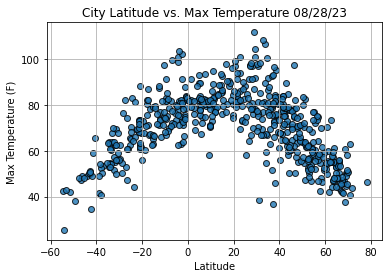

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [30]:
# The balance of the scatter plots will share the same format. 
# All that we need to do is change the v-axis variable for each weather parameter. 

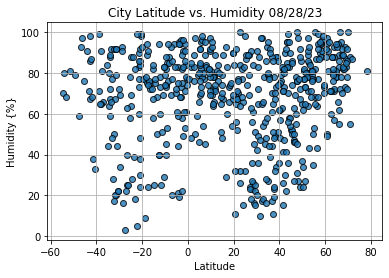

In [31]:
# Mod 6.3.2 Plot Latitude vs Humidity
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity {%}")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


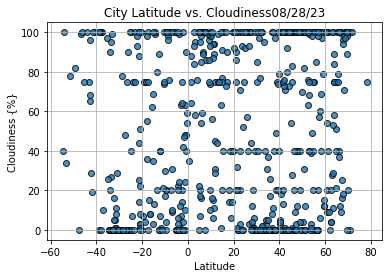

In [33]:
# Mod 6.3.3 Plot Latitude vs Cloudiness
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness {%}")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

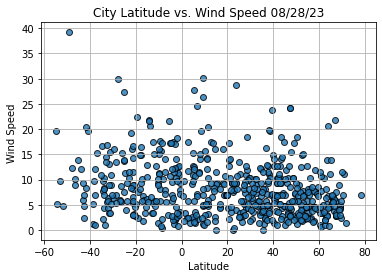

In [35]:
# Mod 6.3.4 Plot Latitude vs Wind Speed
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()